In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots

In [3]:
tourism_colors = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#f95d6a", "#ff7c43", "#ffa600"]


In [8]:
filepath = "General Data 2014-2020.csv"
df = pd.read_csv(filepath)
df

,year,noftaii,noftaiiagr,noindfi,noindfiagr,nodtvasu,nodtvasuagr,feeftit,feeftitagr,feeftust,...,apfitr,apritragr,ipwiita,ipwirwta,ipwsiitr,ipwirwtr,ipaprita,ipaprirta,ipapritr,ipaprirtr
0,2014,7.68,10.2,18.33,10.3,1290.00,12.9,123320,14.5,20.240,...,377.0,4.7,0.68,41,1.62,15,2.91,12,5.37,8
1,2015,8.03,4.5,20.38,11.1,1432.00,11.6,135193,9.6,21.070,...,418.9,-0.3,0.68,40,1.71,14,2.88,11,5.03,7
2,2016,8.80,9.7,21.87,7.3,1613.60,12.7,154146,14.0,22.920,...,366.7,4.9,1.18,25,1.88,13,4.72,8,6.25,7
3,2017,10.04,14.0,23.94,9.5,1652.49,2.3,177874,15.4,27.310,...,389.5,5.0,1.17,26,2.05,13,4.81,7,7.01,7
4,2018,10.56,5.2,26.30,9.8,1854.90,11.9,194892,9.6,28.585,...,432.9,9.3,1.24,25,1.97,13,5.05,7,6.60,7
5,2019,10.93,3.5,26.92,2.4,2321.98,25.3,211661,8.6,30.058,...,443.1,1.6,1.23,23,2.03,12,4.97,8,6.78,6
6,2020,2.74,-74.9,7.29,-97.3,610.22,-73.7,50136,-76.3,6.958,...,132.5,-70.0,1.59,-,1.30,-,11.90,-,5.25,-


In [5]:
column_dict = {
    "year": "Year",
    "noftaii": "Foreign Tourist Arrivals (millions)",
    "noftaiiagr": "Foreign Arrivals Growth Rate (%)",
    "noindfi": "Domestic Travelers (millions)",
    "noindfiagr": "Domestic Travelers Growth Rate (%)",
    "nodtvasu": "Domestic Visits to States/UTs (millions)",
    "nodtvasuagr": "Domestic Visits Growth Rate (%)",
    "feeftit": "Foreign Exchange Earnings (₹ crore)",
    "feeftitagr": "Foreign Exchange Earnings Growth Rate (₹, %)",
    "feeftust": "Foreign Exchange Earnings (US$ billions)",
    "feeftustagr": "Foreign Exchange Earnings Growth Rate (US$, %)",
    "wnoita": "World Tourist Arrivals (millions)",
    "wnoitaagr": "World Tourist Arrivals Growth Rate (%)",
    "witr": "World Tourism Receipts (US$ billions)",
    "witragr": "World Tourism Receipts Growth Rate (%)",
    "aprnoita": "Average Receipt per Tourist (₹)",
    "aprnoitaagr": "Average Receipt per Tourist Growth Rate (₹, %)",
    "apfitr": "Average Receipt per Tourist (US$)",
    "apritragr": "Average Receipt per Tourist Growth Rate (US$, %)",
    "ipwiita": "India's Share in World Tourist Arrivals (%)",
    "ipwirwta": "India's Rank in World Tourist Arrivals",
    "ipwsiitr": "India's Share in World Tourism Receipts (%)",
    "ipwirwtr": "India's Rank in World Tourism Receipts",
    "ipaprita": "India's Growth in Tourist Arrivals (%)",
    "ipaprirta": "India's Rank in Tourist Arrivals Growth",
    "ipapritr": "India's Growth in Tourism Receipts (%)",
    "ipaprirtr": "India's Rank in Tourism Receipts Growth"
}

In [9]:
df.set_index('year', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 2014 to 2020
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   noftaii      7 non-null      float64
 1   noftaiiagr   7 non-null      float64
 2   noindfi      7 non-null      float64
 3   noindfiagr   7 non-null      float64
 4   nodtvasu     7 non-null      float64
 5   nodtvasuagr  7 non-null      float64
 6   feeftit      7 non-null      int64  
 7   feeftitagr   7 non-null      float64
 8   feeftust     7 non-null      float64
 9   feeftustagr  7 non-null      float64
 10  wnoita       7 non-null      int64  
 11  wnoitaagr    7 non-null      float64
 12  witr         7 non-null      int64  
 13  witragr      7 non-null      float64
 14  aprnoita     7 non-null      float64
 15  aprnoitaagr  7 non-null      float64
 16  apfitr       7 non-null      float64
 17  apritragr    7 non-null      float64
 18  ipwiita      7 non-null      float64
 19  ipwirwta   

In [11]:
for col in df.columns:
    if df[col].dtype == object:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [10]:
df['Domestic/Foreign Ratio'] = df['noindfi'] / df['noftaii']
df['Domestic Visits/Travelers Ratio'] = df['nodtvasu'] / df['noindfi']
df['Forex per Foreign Tourist (₹ crore)'] = df['feeftit'] / df['noftaii']

In [12]:
df['Period'] = 'Pre-COVID'
df.loc[2020, 'Period'] = 'COVID'

In [13]:
df_clean = df.copy()
df_clean.rename(columns=column_dict, inplace=True)
df_clean

,Foreign Tourist Arrivals (millions),Foreign Arrivals Growth Rate (%),Domestic Travelers (millions),Domestic Travelers Growth Rate (%),Domestic Visits to States/UTs (millions),Domestic Visits Growth Rate (%),Foreign Exchange Earnings (₹ crore),"Foreign Exchange Earnings Growth Rate (₹, %)",Foreign Exchange Earnings (US$ billions),"Foreign Exchange Earnings Growth Rate (US$, %)",...,India's Share in World Tourism Receipts (%),India's Rank in World Tourism Receipts,India's Growth in Tourist Arrivals (%),India's Rank in Tourist Arrivals Growth,India's Growth in Tourism Receipts (%),India's Rank in Tourism Receipts Growth,Domestic/Foreign Ratio,Domestic Visits/Travelers Ratio,Forex per Foreign Tourist (₹ crore),Period
year,,,,,,,,,,,,,,,,,,,,,
2014,7.68,10.2,18.33,10.3,1290.00,12.9,123320,14.5,20.240,9.7,...,1.62,15.0,2.91,12.0,5.37,8.0,2.386719,70.376432,16057.291667,Pre-COVID
2015,8.03,4.5,20.38,11.1,1432.00,11.6,135193,9.6,21.070,4.1,...,1.71,14.0,2.88,11.0,5.03,7.0,2.537983,70.264966,16835.990037,Pre-COVID
2016,8.80,9.7,21.87,7.3,1613.60,12.7,154146,14.0,22.920,8.8,...,1.88,13.0,4.72,8.0,6.25,7.0,2.485227,73.781436,17516.590909,Pre-COVID
2017,10.04,14.0,23.94,9.5,1652.49,2.3,177874,15.4,27.310,19.1,...,2.05,13.0,4.81,7.0,7.01,7.0,2.384462,69.026316,17716.533865,Pre-COVID
2018,10.56,5.2,26.30,9.8,1854.90,11.9,194892,9.6,28.585,4.7,...,1.97,13.0,5.05,7.0,6.60,7.0,2.490530,70.528517,18455.681818,Pre-COVID
2019,10.93,3.5,26.92,2.4,2321.98,25.3,211661,8.6,30.058,5.1,...,2.03,12.0,4.97,8.0,6.78,6.0,2.462946,86.254829,19365.141812,Pre-COVID
2020,2.74,-74.9,7.29,-97.3,610.22,-73.7,50136,-76.3,6.958,-76.9,...,1.30,NaN,11.90,NaN,5.25,NaN,2.660584,83.706447,18297.810219,COVID


In [15]:
key_metrics = ['noftaii', 'noindfi', 'nodtvasu', 'feeftit', 'feeftust', 'wnoita', 'witr']
key_metrics_clean = [column_dict[col] for col in key_metrics]

print("\n3. Summary Statistics for Key Metrics:")
print(df_clean[key_metrics_clean].describe().round(2))


3. Summary Statistics for Key Metrics:
       Foreign Tourist Arrivals (millions)  Domestic Travelers (millions)  \
count                                 7.00                           7.00   
mean                                  8.40                          20.72   
std                                   2.79                           6.68   
min                                   2.74                           7.29   
25%                                   7.86                          19.35   
50%                                   8.80                          21.87   
75%                                  10.30                          25.12   
max                                  10.93                          26.92   

       Domestic Visits to States/UTs (millions)  \
count                                      7.00   
mean                                    1539.31   
std                                      527.16   
min                                      610.22   
25%        

In [16]:
# Growth analysis (2014-2019, excluding COVID year)
print("\n4. Pre-COVID Growth Analysis (2014-2019):")
df_pre_covid = df[df.index < 2020]

for metric in key_metrics[:5]:  # First 5 key metrics
    start_val = df_pre_covid.loc[2014, metric]
    end_val = df_pre_covid.loc[2019, metric]
    total_growth = ((end_val / start_val) - 1) * 100
    cagr = (end_val / start_val) ** (1/5) - 1
    
    print(f"{column_dict[metric]}:")
    print(f"  - 2014 value: {start_val:.2f}")
    print(f"  - 2019 value: {end_val:.2f}")
    print(f"  - Total growth: {total_growth:.2f}%")
    print(f"  - Compound Annual Growth Rate: {cagr*100:.2f}%")


4. Pre-COVID Growth Analysis (2014-2019):
Foreign Tourist Arrivals (millions):
  - 2014 value: 7.68
  - 2019 value: 10.93
  - Total growth: 42.32%
  - Compound Annual Growth Rate: 7.31%
Domestic Travelers (millions):
  - 2014 value: 18.33
  - 2019 value: 26.92
  - Total growth: 46.86%
  - Compound Annual Growth Rate: 7.99%
Domestic Visits to States/UTs (millions):
  - 2014 value: 1290.00
  - 2019 value: 2321.98
  - Total growth: 80.00%
  - Compound Annual Growth Rate: 12.47%
Foreign Exchange Earnings (₹ crore):
  - 2014 value: 123320.00
  - 2019 value: 211661.00
  - Total growth: 71.64%
  - Compound Annual Growth Rate: 11.41%
Foreign Exchange Earnings (US$ billions):
  - 2014 value: 20.24
  - 2019 value: 30.06
  - Total growth: 48.51%
  - Compound Annual Growth Rate: 8.23%


In [17]:
# COVID-19 impact analysis
print("\n5. COVID-19 Impact Analysis (2019 vs 2020):")
for metric in key_metrics[:5]:
    val_2019 = df.loc[2019, metric]
    val_2020 = df.loc[2020, metric]
    pct_change = ((val_2020 / val_2019) - 1) * 100
    
    print(f"{column_dict[metric]}: {pct_change:.2f}%")


5. COVID-19 Impact Analysis (2019 vs 2020):
Foreign Tourist Arrivals (millions): -74.93%
Domestic Travelers (millions): -72.92%
Domestic Visits to States/UTs (millions): -73.72%
Foreign Exchange Earnings (₹ crore): -76.31%
Foreign Exchange Earnings (US$ billions): -76.85%


In [18]:
print("\n6. Correlation Matrix for Key Metrics:")
corr_matrix = df[key_metrics].corr().round(2)
print(corr_matrix)


6. Correlation Matrix for Key Metrics:
          noftaii  noindfi  nodtvasu  feeftit  feeftust  wnoita  witr
noftaii      1.00     1.00      0.95     0.99      1.00    0.99  0.98
noindfi      1.00     1.00      0.96     0.99      1.00    0.99  0.98
nodtvasu     0.95     0.96      1.00     0.98      0.95    0.93  0.91
feeftit      0.99     0.99      0.98     1.00      0.99    0.96  0.94
feeftust     1.00     1.00      0.95     0.99      1.00    0.98  0.97
wnoita       0.99     0.99      0.93     0.96      0.98    1.00  0.99
witr         0.98     0.98      0.91     0.94      0.97    0.99  1.00


In [19]:
print("\n7. India's Global Position in Tourism:")
print("Year | Arrivals Rank | Receipts Rank | Share in Arrivals (%) | Share in Receipts (%)")
print("-" * 75)

for year in df.index:
    arrivals_rank = df.loc[year, 'ipwirwta']
    receipts_rank = df.loc[year, 'ipwirwtr']
    arrivals_share = df.loc[year, 'ipwiita']
    receipts_share = df.loc[year, 'ipwsiitr']
    
    arrivals_rank_str = str(int(arrivals_rank)) if not pd.isna(arrivals_rank) else "N/A"
    receipts_rank_str = str(int(receipts_rank)) if not pd.isna(receipts_rank) else "N/A"
    
    print(f"{year} | {arrivals_rank_str:12} | {receipts_rank_str:12} | {arrivals_share:19.2f} | {receipts_share:19.2f}")



7. India's Global Position in Tourism:
Year | Arrivals Rank | Receipts Rank | Share in Arrivals (%) | Share in Receipts (%)
---------------------------------------------------------------------------
2014 | 41           | 15           |                0.68 |                1.62
2015 | 40           | 14           |                0.68 |                1.71
2016 | 25           | 13           |                1.18 |                1.88
2017 | 26           | 13           |                1.17 |                2.05
2018 | 25           | 13           |                1.24 |                1.97
2019 | 23           | 12           |                1.23 |                2.03
2020 | N/A          | N/A          |                1.59 |                1.30


In [20]:
print("\n8. Domestic vs Foreign Tourism Ratio:")
for year in df.index:
    ratio = df.loc[year, 'Domestic/Foreign Ratio']
    print(f"{year}: {ratio:.2f}")


8. Domestic vs Foreign Tourism Ratio:
2014: 2.39
2015: 2.54
2016: 2.49
2017: 2.38
2018: 2.49
2019: 2.46
2020: 2.66


In [21]:
analysis_results = {
    'key_metrics': key_metrics,
    'key_metrics_clean': key_metrics_clean,
    'growth_analysis': {
        'total_growth': {metric: ((df.loc[2019, metric] / df.loc[2014, metric]) - 1) * 100 
                        for metric in key_metrics[:5]},
        'cagr': {metric: ((df.loc[2019, metric] / df.loc[2014, metric]) ** (1/5) - 1) * 100
                for metric in key_metrics[:5]}
    },
    'covid_impact': {metric: ((df.loc[2020, metric] / df.loc[2019, metric]) - 1) * 100
                    for metric in key_metrics[:5]},
    'correlation_matrix': corr_matrix
}

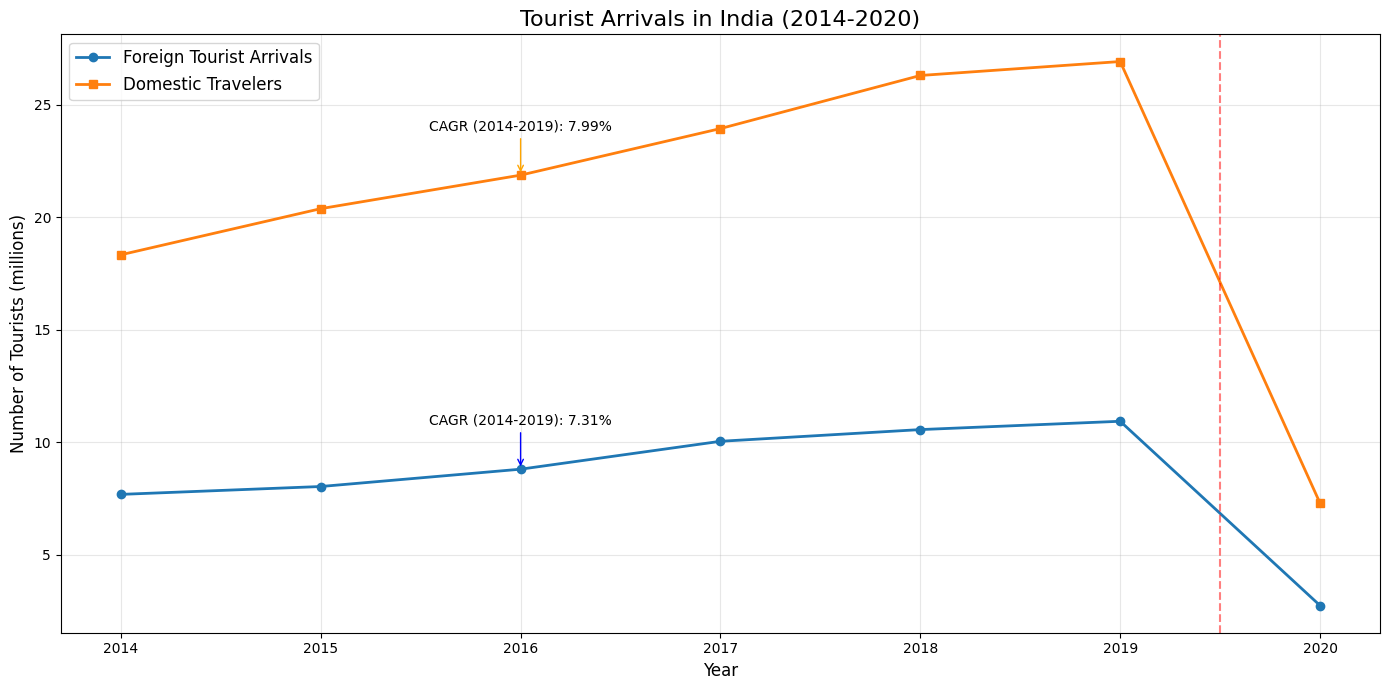

In [23]:
# 1. Time Series Plot of Tourist Arrivals
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['noftaii'], marker='o', linewidth=2, label='Foreign Tourist Arrivals')
plt.plot(df.index, df['noindfi'], marker='s', linewidth=2, label='Domestic Travelers')

plt.title('Tourist Arrivals in India (2014-2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Tourists (millions)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.xticks(df.index)

# Add a vertical line to mark pre-COVID and COVID periods
plt.axvline(x=2019.5, color='r', linestyle='--', alpha=0.5, label='COVID-19 Impact')

# Add text annotations for CAGR
foreign_cagr = analysis_results['growth_analysis']['cagr']['noftaii']
domestic_cagr = analysis_results['growth_analysis']['cagr']['noindfi']

plt.annotate(f'CAGR (2014-2019): {foreign_cagr:.2f}%', 
            xy=(2016, df.loc[2016, 'noftaii']), 
            xytext=(2016, df.loc[2016, 'noftaii'] + 2),
            fontsize=10, ha='center',
            arrowprops=dict(arrowstyle='->', color='blue'))

plt.annotate(f'CAGR (2014-2019): {domestic_cagr:.2f}%', 
            xy=(2016, df.loc[2016, 'noindfi']), 
            xytext=(2016, df.loc[2016, 'noindfi'] + 2),
            fontsize=10, ha='center',
            arrowprops=dict(arrowstyle='->', color='orange'))

plt.tight_layout()
plt.savefig('tourist_arrivals_trend.png', dpi=300)

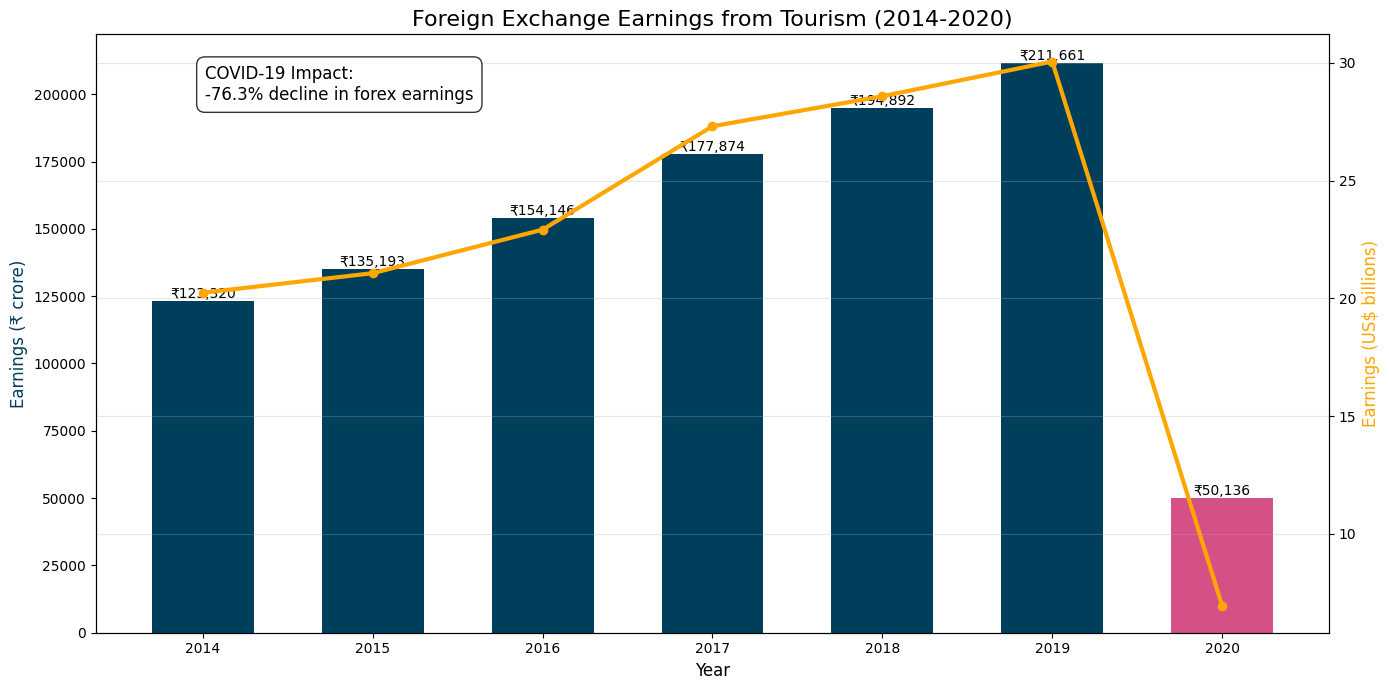

In [24]:
# 2. Foreign Exchange Earnings Bar Chart
plt.figure(figsize=(14, 7))

bars = plt.bar(df.index, df['feeftit'], width=0.6, 
                color=[tourism_colors[0] if year != 2020 else tourism_colors[4] for year in df.index])

# Add a line for USD earnings on a secondary y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()

ax2.plot(df.index, df['feeftust'], marker='o', color=tourism_colors[-1], linewidth=3, label='USD Earnings')

ax1.set_title('Foreign Exchange Earnings from Tourism (2014-2020)', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Earnings (₹ crore)', fontsize=12, color=tourism_colors[0])
ax2.set_ylabel('Earnings (US$ billions)', fontsize=12, color=tourism_colors[-1])

# Add data labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'₹{int(height):,}',
            ha='center', va='bottom', fontsize=10)

# Add a text box highlighting COVID impact
covid_impact = analysis_results['covid_impact']['feeftit']
plt.figtext(0.15, 0.85, f'COVID-19 Impact:\n{covid_impact:.1f}% decline in forex earnings',
            fontsize=12, ha='left',
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

plt.xticks(df.index)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('forex_earnings.png', dpi=300)

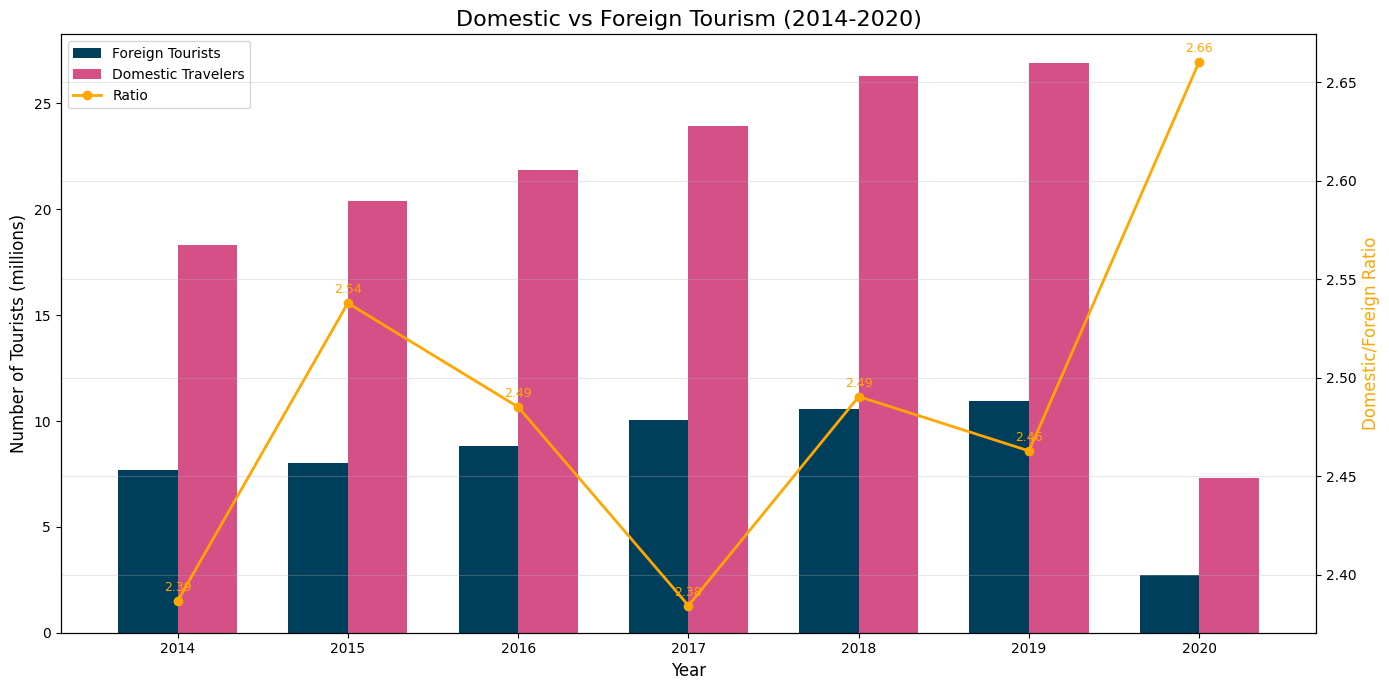

In [25]:
plt.figure(figsize=(14, 7))

x = np.arange(len(df.index))
width = 0.35

plt.bar(x - width/2, df['noftaii'], width, label='Foreign Tourists', color=tourism_colors[0])
plt.bar(x + width/2, df['noindfi'], width, label='Domestic Travelers', color=tourism_colors[4])

plt.title('Domestic vs Foreign Tourism (2014-2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Tourists (millions)', fontsize=12)
plt.xticks(x, df.index)
plt.legend(fontsize=12)

# Add a line for the ratio on a secondary y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()

ax2.plot(x, df['Domestic/Foreign Ratio'], 'o-', color=tourism_colors[-1], linewidth=2, label='Ratio')
ax2.set_ylabel('Domestic/Foreign Ratio', fontsize=12, color=tourism_colors[-1])

# Add ratio values as text
for i, ratio in enumerate(df['Domestic/Foreign Ratio']):
    ax2.annotate(f'{ratio:.2f}', 
                xy=(i, ratio), 
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=9, color=tourism_colors[-1])

# Add both legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('domestic_vs_foreign.png', dpi=300)

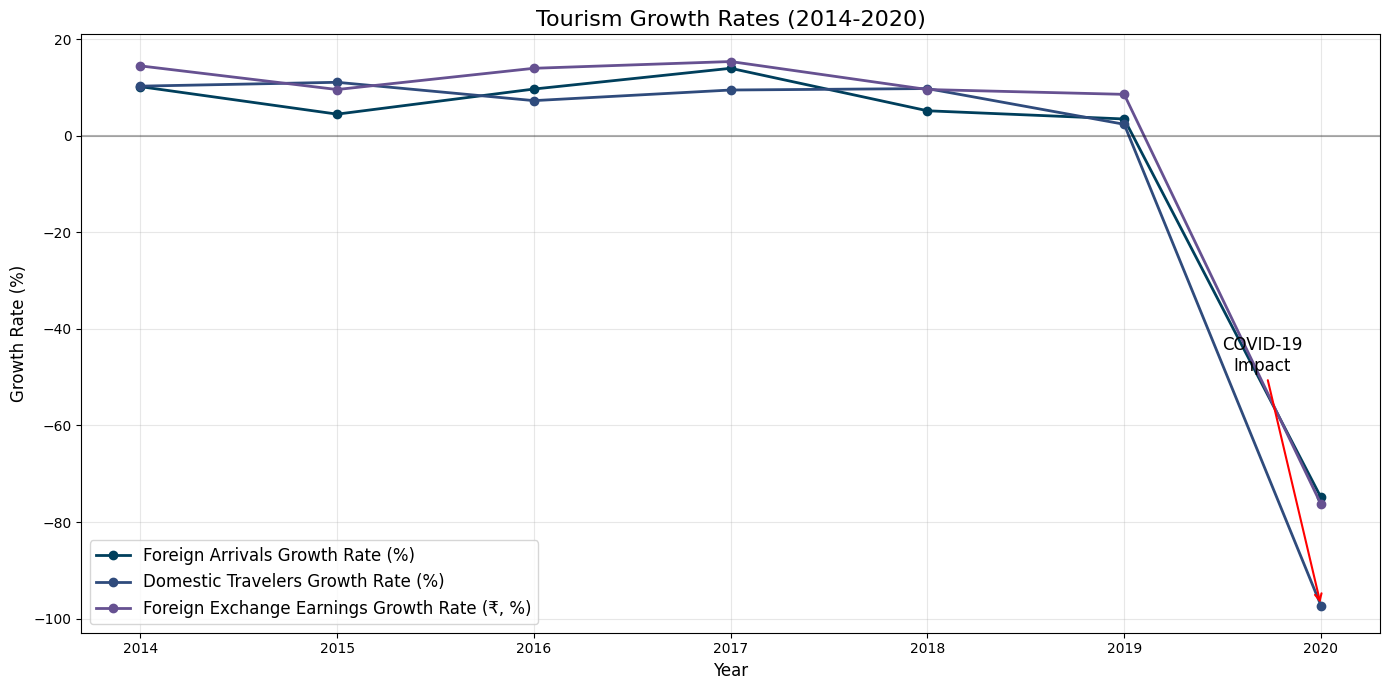

In [26]:
# 4. Growth Rates Comparison
plt.figure(figsize=(14, 7))

growth_cols = ['noftaiiagr', 'noindfiagr', 'feeftitagr']
growth_labels = [column_dict[col] for col in growth_cols]

for i, col in enumerate(growth_cols):
    plt.plot(df.index, df[col], marker='o', linewidth=2, label=growth_labels[i], color=tourism_colors[i])

plt.title('Tourism Growth Rates (2014-2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Annotate the extreme drop in 2020
min_y = df.loc[2020, growth_cols].min()
plt.annotate('COVID-19\nImpact', 
            xy=(2020, min_y), 
            xytext=(2019.7, min_y/2),
            fontsize=12, ha='center',
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

plt.tight_layout()
plt.savefig('growth_rates.png', dpi=300)

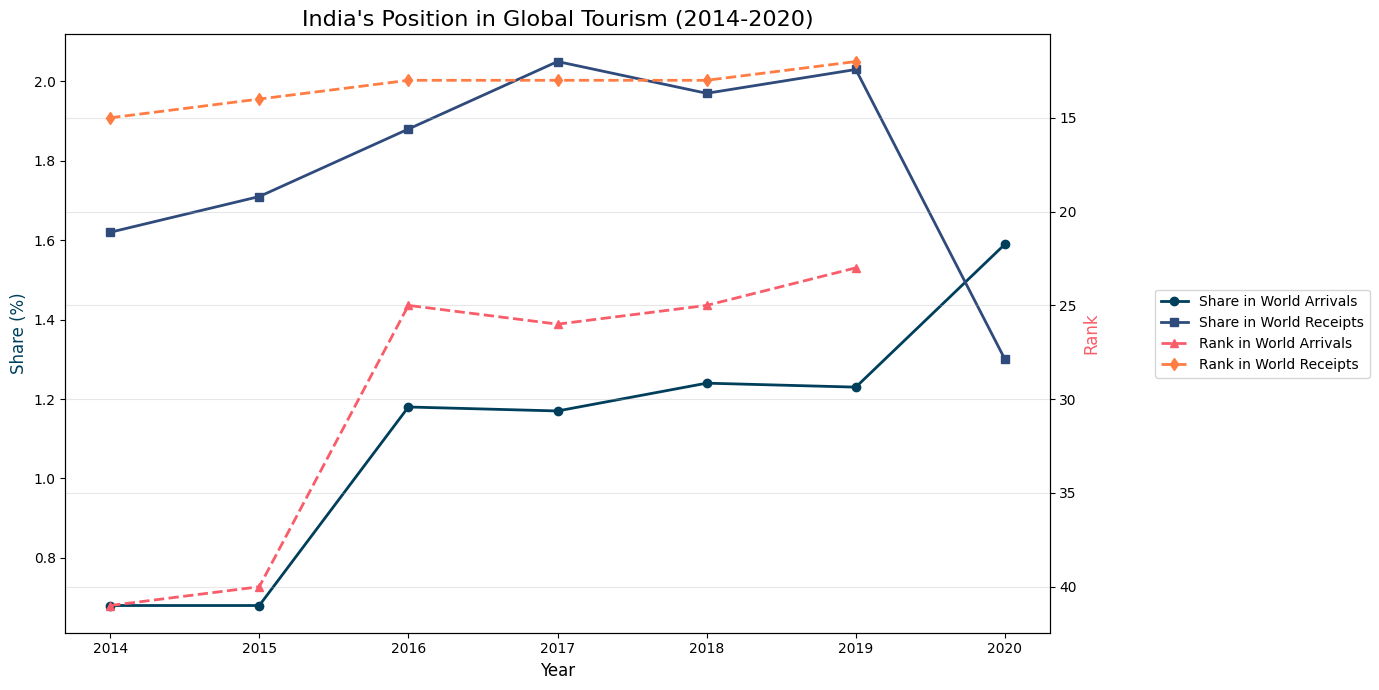

In [27]:
plt.figure(figsize=(14, 7))

ax1 = plt.gca()
ax2 = ax1.twinx()

# Plot percentage share
ax1.plot(df.index, df['ipwiita'], 'o-', linewidth=2, label="Share in World Arrivals", color=tourism_colors[0])
ax1.plot(df.index, df['ipwsiitr'], 's-', linewidth=2, label="Share in World Receipts", color=tourism_colors[1])

# Plot rankings (inverted scale since lower is better)
ax2.plot(df.index, df['ipwirwta'], '^--', linewidth=2, label="Rank in World Arrivals", color=tourism_colors[5])
ax2.plot(df.index, df['ipwirwtr'], 'd--', linewidth=2, label="Rank in World Receipts", color=tourism_colors[6])

# Set labels and title
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Share (%)', fontsize=12, color=tourism_colors[0])
ax2.set_ylabel('Rank', fontsize=12, color=tourism_colors[5])

# Invert the rank axis (lower is better)
ax2.invert_yaxis()

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left', bbox_to_anchor=(1.1, 0.5))

plt.title("India's Position in Global Tourism (2014-2020)", fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('global_position.png', dpi=300)

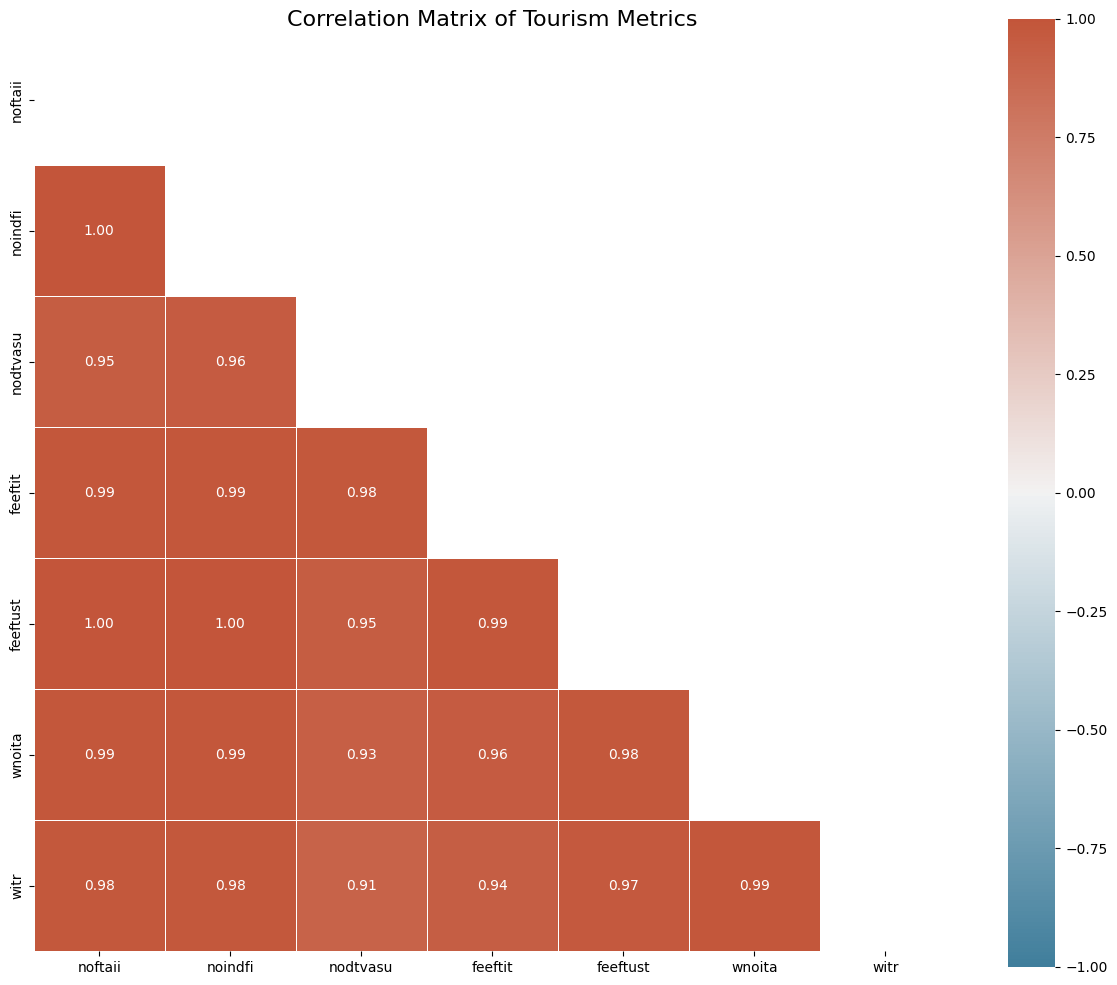

In [28]:
plt.figure(figsize=(12, 10))

mask = np.triu(np.ones_like(analysis_results['correlation_matrix'], dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(analysis_results['correlation_matrix'], mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True, fmt='.2f', vmin=-1, vmax=1)

plt.title('Correlation Matrix of Tourism Metrics', fontsize=16)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300)

In [30]:
# 1. Multi-dimensional Bubble Chart
# Year on x-axis, Foreign Arrivals on y-axis, Bubble size = Domestic Visits, Color = Forex Earnings
fig_bubble = px.scatter(
    df_clean, 
    x=df_clean.index,
    y='Foreign Tourist Arrivals (millions)',
    size='Domestic Visits to States/UTs (millions)',
    color='Foreign Exchange Earnings (₹ crore)',
    hover_name=df_clean.index,
    size_max=60,
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Multi-dimensional View of Tourism in India (2014-2020)'
)

fig_bubble.update_layout(
    xaxis_title='Year',
    yaxis_title='Foreign Tourist Arrivals (millions)',
    coloraxis_colorbar_title='Forex (₹ crore)',
    xaxis=dict(tickmode='array', tickvals=df_clean.index),
    showlegend=False
)
fig_bubble.show()

In [31]:
# 2. Line Chart with Range Slider
fig_trends = go.Figure()

metrics = ['Foreign Tourist Arrivals (millions)', 
            'Domestic Travelers (millions)',
            'Foreign Exchange Earnings (US$ billions)']

for i, metric in enumerate(metrics):
    fig_trends.add_trace(go.Scatter(
        x=df_clean.index, 
        y=df_clean[metric],
        mode='lines+markers',
        name=metric,
        line=dict(color=tourism_colors[i], width=3)
    ))

fig_trends.update_layout(
    title='Tourism Trends in India (2014-2020)',
    xaxis_title='Year',
    yaxis_title='Value',
    hovermode='x unified',
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='linear',
        tickmode='array',
        tickvals=df_clean.index
    )
)

fig_trends.show()

In [33]:
global_metrics = [
    "India's Share in World Tourist Arrivals (%)",
    "India's Share in World Tourism Receipts (%)",
    "India's Growth in Tourist Arrivals (%)",
    "India's Growth in Tourism Receipts (%)"
]

# Filter years for clarity (exclude 2020 for cleaner visualization)
years_for_radar = [2014, 2016, 2018, 2019]

fig_radar = go.Figure()

for year in years_for_radar:
    year_data = df_clean.loc[year, global_metrics].tolist()
    
    if any(pd.isna(val) for val in year_data):
        # Skip years with missing data
        continue
        
    fig_radar.add_trace(go.Scatterpolar(
        r=year_data,
        theta=global_metrics,
        fill='toself',
        name=f'{year}'
    ))

fig_radar.update_layout(
    title='India\'s Global Tourism Position - Multiple Years Comparison',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max([df_clean[m].max() for m in global_metrics if df_clean[m].max() == df_clean[m].max()])]
        )
    ),
    showlegend=True
)

fig_radar.show()

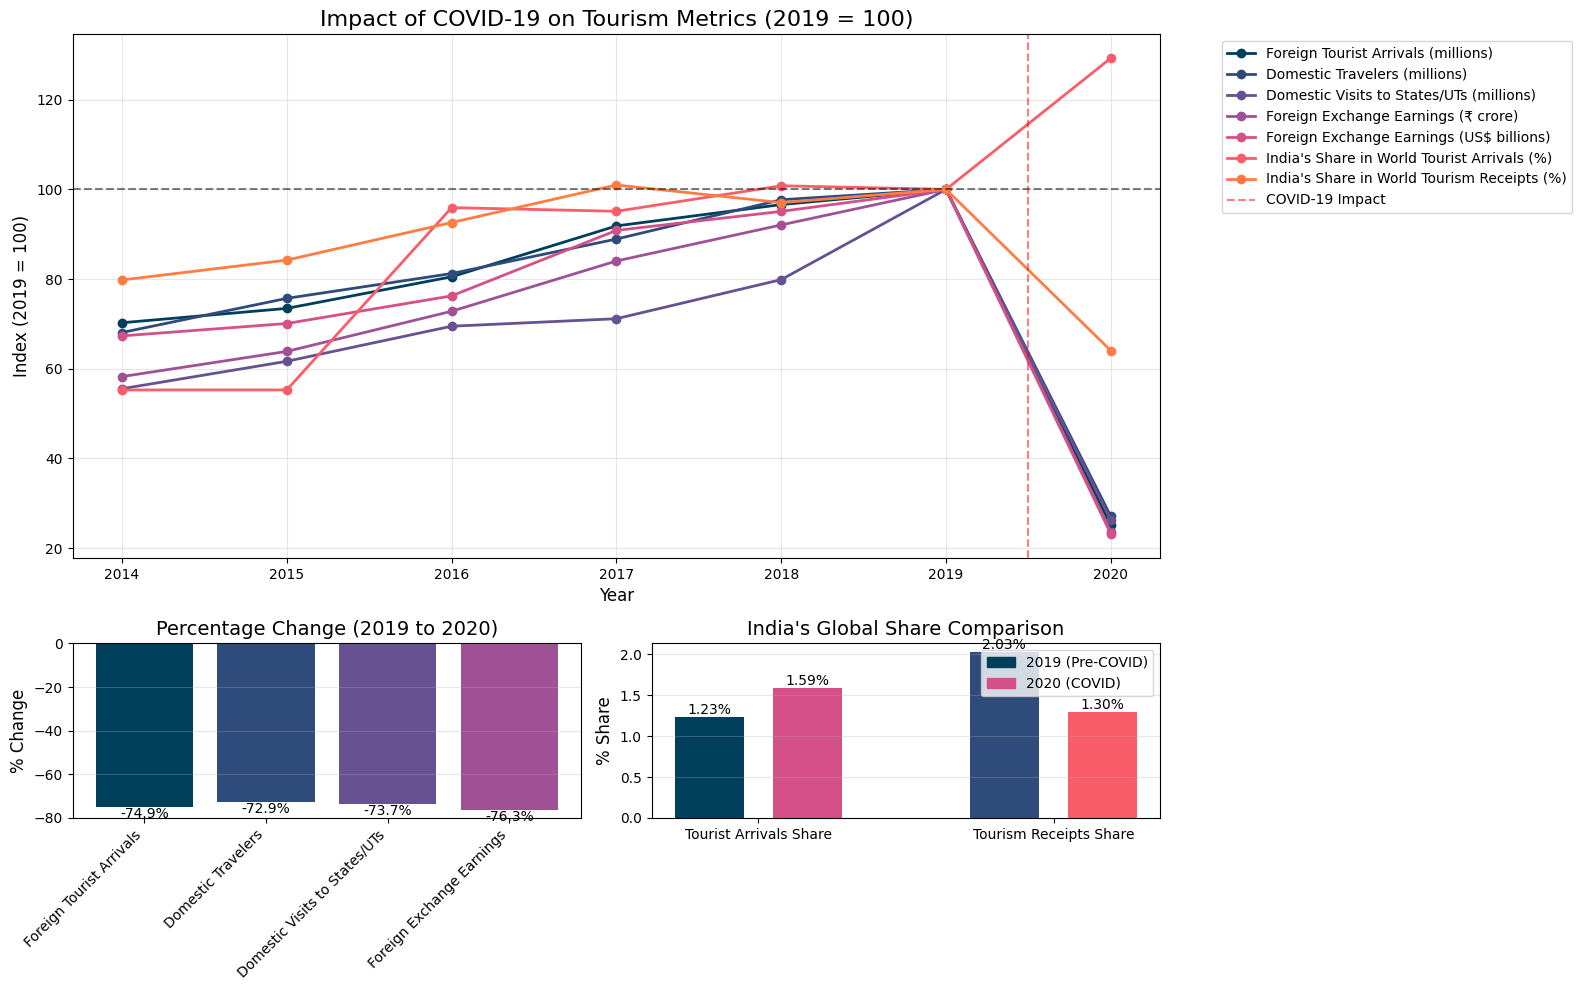

In [36]:
plt.figure(figsize=(16, 10))

# Select key metrics to compare
compare_metrics = [
    'Foreign Tourist Arrivals (millions)',
    'Domestic Travelers (millions)',
    'Domestic Visits to States/UTs (millions)',
    'Foreign Exchange Earnings (₹ crore)',
    'Foreign Exchange Earnings (US$ billions)',
    "India's Share in World Tourist Arrivals (%)",
    "India's Share in World Tourism Receipts (%)"
]

# Normalize all metrics to compare on same scale (2019 = 100)
df_norm = df_clean[compare_metrics].copy()
for col in df_norm.columns:
    df_norm[col] = (df_norm[col] / df_norm.loc[2019, col]) * 100

# Create a GridSpec layout
gs = GridSpec(2, 4, height_ratios=[3, 1])

# Main plot - normalized metrics
ax1 = plt.subplot(gs[0, :])

for i, col in enumerate(compare_metrics):
    ax1.plot(df_norm.index, df_norm[col], marker='o', linewidth=2, 
                label=col, color=tourism_colors[i % len(tourism_colors)])

ax1.axhline(y=100, color='k', linestyle='--', alpha=0.5)
ax1.axvline(x=2019.5, color='r', linestyle='--', alpha=0.5, label='COVID-19 Impact')

ax1.set_title('Impact of COVID-19 on Tourism Metrics (2019 = 100)', fontsize=16)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Index (2019 = 100)', fontsize=12)
ax1.set_xticks(df_norm.index)
ax1.grid(True, alpha=0.3)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# 2019 vs 2020 percentage change subplot
ax2 = plt.subplot(gs[1, :2])

# Calculate percentage changes
pct_changes = [(df_clean.loc[2020, col] / df_clean.loc[2019, col] - 1) * 100 
                for col in compare_metrics[:4]]  # First 4 metrics

bars = ax2.bar(range(len(pct_changes)), pct_changes, 
                color=[tourism_colors[i] for i in range(len(pct_changes))])

ax2.set_title('Percentage Change (2019 to 2020)', fontsize=14)
ax2.set_xticks(range(len(pct_changes)))
ax2.set_xticklabels([m.split('(')[0].strip() for m in compare_metrics[:4]], rotation=45, ha='right')
ax2.set_ylabel('% Change', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%',
            ha='center', va='bottom' if height > 0 else 'top', fontsize=10)

# India's global position subplot
ax3 = plt.subplot(gs[1, 2:])

# Compare India's market share before and during COVID
share_data = [
    df_clean.loc[2019, "India's Share in World Tourist Arrivals (%)"],
    df_clean.loc[2020, "India's Share in World Tourist Arrivals (%)"],
    df_clean.loc[2019, "India's Share in World Tourism Receipts (%)"],
    df_clean.loc[2020, "India's Share in World Tourism Receipts (%)"]
]

x_pos = [0, 1, 3, 4]
colors = [tourism_colors[0], tourism_colors[4], tourism_colors[1], tourism_colors[5]]

bars = ax3.bar(x_pos, share_data, width=0.7, color=colors)

ax3.set_title('India\'s Global Share Comparison', fontsize=14)
ax3.set_xticks([0.5, 3.5])
ax3.set_xticklabels(['Tourist Arrivals Share', 'Tourism Receipts Share'])
ax3.set_ylabel('% Share', fontsize=12)
ax3.grid(True, alpha=0.3, axis='y')

# Add a legend for pre-COVID vs COVID
import matplotlib.patches as mpatches
legend_elements = [
    mpatches.Patch(color=tourism_colors[0], label='2019 (Pre-COVID)'),
    mpatches.Patch(color=tourism_colors[4], label='2020 (COVID)')
]
ax3.legend(handles=legend_elements, loc='upper right')

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('covid_impact_analysis.png', dpi=300)
plt.show()